# Análisis Exploratorio de Datos

## Importar librerías

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

## Carga de los datos limpios

In [146]:
archivo = 'BBDD_Hospitalizacion_limpio.csv'
df = pd.read_csv(archivo)
print(f'Se cargaron los datos del archivo {archivo}')

Se cargaron los datos del archivo BBDD_Hospitalizacion_limpio.csv


## Exploración inicial

In [147]:
df

,edad,diabetes,hospitaliz_ult_mes,psa,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,nro_muestras,cup,epoc,biopsia,nro_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0
429,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
430,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
431,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       433 non-null    int64  
 1   diabetes                   433 non-null    object 
 2   hospitaliz_ult_mes         433 non-null    object 
 3   psa                        433 non-null    float64
 4   biopsias_prev              433 non-null    object 
 5   vol_prostatico             433 non-null    object 
 6   antibiotico_en_profilaxis  433 non-null    object 
 7   nro_muestras               433 non-null    int64  
 8   cup                        433 non-null    object 
 9   epoc                       433 non-null    object 
 10  biopsia                    433 non-null    object 
 11  nro_dias_con_infecc        433 non-null    int64  
 12  fiebre                     433 non-null    object 
 13  itu                        433 non-null    object 

In [149]:
df.describe()

,edad,psa,nro_muestras,nro_dias_con_infecc,dias_hosp_mq,dias_hosp_upc
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,64.230947,14.257875,12.907621,0.168591,0.210162,0.018476
std,9.977162,17.422817,4.000088,0.845321,1.084268,0.224908
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


In [150]:
df.describe(include='object')

,diabetes,hospitaliz_ult_mes,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,cup,epoc,biopsia,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
count,433,433,433,433,433,433,433,433,433,433,433,433,433,433
unique,2,2,2,2,4,2,2,9,2,2,4,3,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
freq,381,429,389,307,345,430,419,213,397,427,425,425,426,410


## Análisis unidimensional

### Variables cuantitativas

#### 'edad'

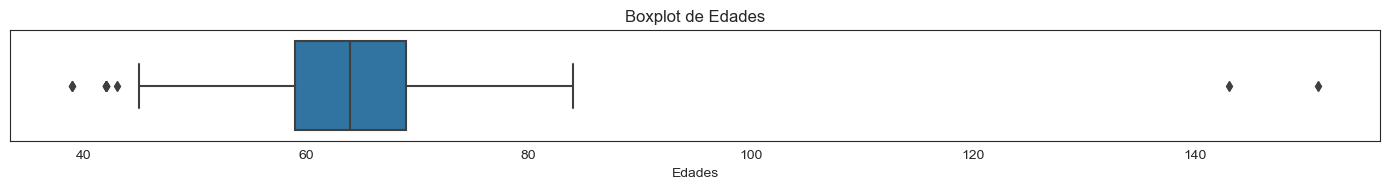

In [151]:
plt.figure(figsize=(14, 2))
# Boxplot
sns.boxplot(data=df, x=df['edad'])

plt.title("Boxplot de Edades"), plt.xlabel('Edades')

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

Claramente se observan dos valores atípicos, con edades superiores a los 140 años. Por lo tanto, se decide borrarlos y revisar nuevamente la distribución de edades.

In [152]:
# Se eliminan registros y se verifica su eliminación
df = df[df['edad'] <= 100]
(df['edad'] > 100).sum()

0

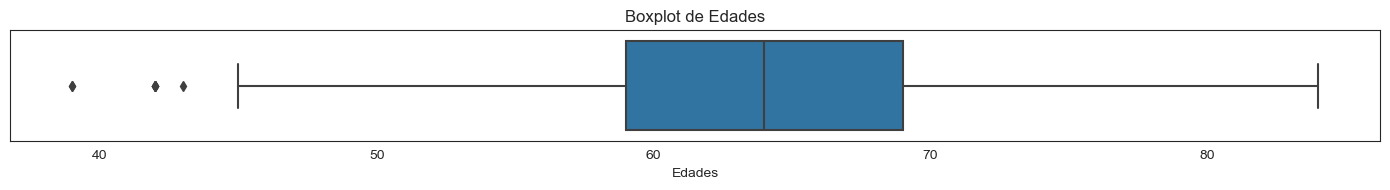

In [153]:
plt.figure(figsize=(14, 2))
# Boxplot
sns.boxplot(data=df, x=df['edad'])

plt.title("Boxplot de Edades"), plt.xlabel('Edades')

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [154]:
#Estadísticas de la columna
df['edad'].describe()

count    431.000000
mean      63.846868
std        8.241400
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max       84.000000
Name: edad, dtype: float64

Tal como se ve en el resumen estadístico como en el boxplot, el 75% de las edades se encuentra entre los 39 y 69 años de edad, con una edad promedio de cerca de 64 años. Hay pacientes con mayor edad, llegando a los 84 años. Se aprecian tres casos de pacientes con edades atípicas por debajo de los 45 años.

#### 'psa'


In [155]:
#Estadísticas de la columna
df['psa'].describe()

count    431.000000
mean      14.295035
std       17.454666
min        0.600000
25%        5.700000
50%        8.100000
75%       16.000000
max      100.000000
Name: psa, dtype: float64

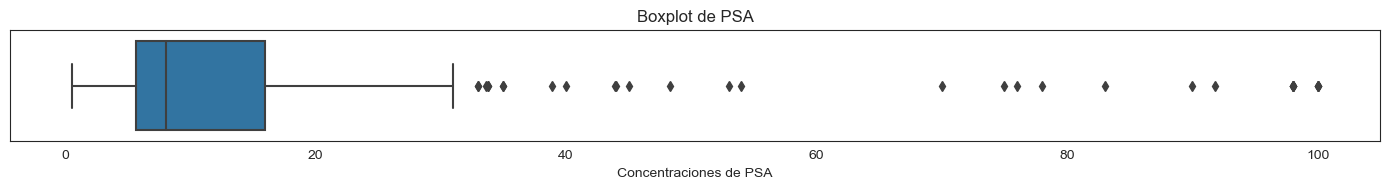

In [156]:
plt.figure(figsize=(14, 2))
# Boxplot
sns.boxplot(data=df, x=df['psa'])

plt.title("Boxplot de PSA"), plt.xlabel('Concentraciones de PSA')

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [157]:
# Cuartiles
q1 = df['psa'].describe()[4]
q3 = df['psa'].describe()[6]

# Valor del vigote
bigote_max = round(q3 + 1.5*(q3 - q1), 2)
print('El bigote superior se ubica en:', bigote_max, 'ng/ml)')

# Cantidad de atípicos
print('Hay', (df['psa'] > bigote_max).sum(), 'pacientes con valores atípicos altos')

El bigote superior se ubica en: 31.45 ng/ml)
Hay 31 pacientes con valores atípicos altos


El 75% de los registros tienen concentraciones por debajo de los 16 ng/ml, pero se observan 31 casos de concentraciones entre los 31,45 a 100 ng/ml.

#### 'nro_muestras'


In [158]:
#Estadísticas de la columna
df['nro_muestras'].describe()

count    431.000000
mean      12.911833
std        4.008900
min        4.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       24.000000
Name: nro_muestras, dtype: float64

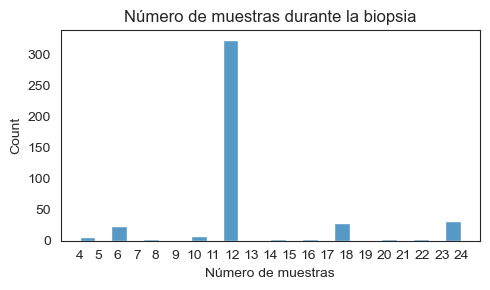

In [159]:
plt.figure(figsize=(5, 3))

sns.histplot(data=df, x=df['nro_muestras'], bins=24)

plt.title("Número de muestras durante la biopsia"), plt.xlabel('Número de muestras')

plt.xticks(range(min(df['nro_muestras']), max(df['nro_muestras']) + 1, 1))

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [160]:
# Frecuencias
moda = df['nro_muestras'].mode()[0]
# Cantidad de la mayor frecuencia
cantidad = (df['nro_muestras'] == moda).sum()
# Total de registros
total = df['nro_muestras'].count()
# Porcentaje de la mayor frecuencia
porcentaje = round(cantidad/total * 100,2)
print(f'En el {porcentaje}% de los pacientes (estos son {cantidad} pacientes) se realizaron {moda} muestras.')

En el 74.94% de los pacientes (estos son 323 pacientes) se realizaron 12 muestras.


Se puede concluir que al casi 75% de los pacientes se les hicieron 12 muestras en la biopsia, mientras que al resto se les tomo como mínimo 4 muestras y hasta un maximo de 24 muestras en algunos casos.

#### 'nro_dias_con_infecc'


In [161]:
#Estadísticas de la columna
df['nro_dias_con_infecc'].describe()

count    431.000000
mean       0.169374
std        0.847206
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: nro_dias_con_infecc, dtype: float64

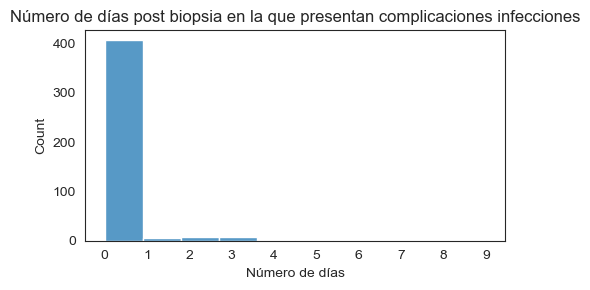

In [162]:
plt.figure(figsize=(5, 3))

sns.histplot(data=df, x=df['nro_dias_con_infecc'])

plt.title("Número de días post biopsia en la que presentan complicaciones infecciones"), plt.xlabel('Número de días')

plt.xticks(range(min(df['nro_dias_con_infecc']), max(df['nro_dias_con_infecc']) + 1, 1))

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [163]:
# Frecuencias
moda = df['nro_dias_con_infecc'].mode()[0]
# Cantidad de la mayor frecuencia
cantidad = (df['nro_dias_con_infecc'] == moda).sum()
# Total de registros
total = df['nro_dias_con_infecc'].count()
# Porcentaje de la mayor frecuencia
porcentaje = round(cantidad/total * 100,2)
print(f'El {porcentaje}% de los pacientes (estos son {cantidad} pacientes) no tuvieron complicaciones post biopsia, dado que registran {moda} días.')

El 94.2% de los pacientes (estos son 406 pacientes) no tuvieron complicaciones post biopsia, dado que registran 0 días.


In [164]:
con_complicaciones = (df['nro_dias_con_infecc'] > 0)
print(f'Hay {con_complicaciones.sum()} que presentaron complicaciones post la biopsia.')

Hay 25 que presentaron complicaciones post la biopsia.


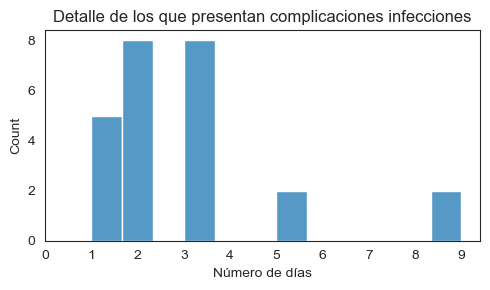

In [165]:
plt.figure(figsize=(5, 3))

sns.histplot(data=df, x=df[df['nro_dias_con_infecc'] !=0]['nro_dias_con_infecc'])

plt.title("Detalle de los que presentan complicaciones infecciones"), plt.xlabel('Número de días')

plt.xticks(range(min(df['nro_dias_con_infecc']), max(df['nro_dias_con_infecc']) + 1, 1))

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

Se puede concluir que 94.2% de los pacientes no tuvieron complicaciones post realizarse la biopsia. Pero de los que sí tuvieron complicaciones, manifestaron infecciones entre 1 a 9 días luego de la intervención, mayormente apareciendo entre los 2 a 3 días.

#### 'dias_hosp_mq'


In [166]:
#Estadísticas de la columna
df['dias_hosp_mq'].describe()

count    431.000000
mean       0.211137
std        1.086692
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       12.000000
Name: dias_hosp_mq, dtype: float64

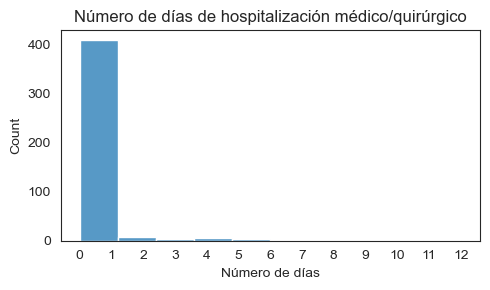

In [167]:
plt.figure(figsize=(5, 3))

sns.histplot(data=df, x=df['dias_hosp_mq'])

plt.title("Número de días de hospitalización médico/quirúrgico"), plt.xlabel('Número de días')

plt.xticks(range(min(df['dias_hosp_mq']), max(df['dias_hosp_mq']) + 1, 1))

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [168]:
# Frecuencias
moda = df['dias_hosp_mq'].mode()[0]
# Cantidad de la mayor frecuencia
cantidad = (df['dias_hosp_mq'] == moda).sum()
# Total de registros
total = df['dias_hosp_mq'].count()
# Porcentaje de la mayor frecuencia
porcentaje = round(cantidad/total * 100,2)
print(f'El {porcentaje}% de los pacientes (estos son {cantidad} pacientes) no fueron hospitalizados por motivos médico/quirúrgico, dado que registran {moda} días.')

El 94.66% de los pacientes (estos son 408 pacientes) no fueron hospitalizados por motivos médico/quirúrgico, dado que registran 0 días.


In [169]:
con_hospitalizacion = (df['dias_hosp_mq'] > 0)
print(f'Hay {con_hospitalizacion.sum()} que fueron hospitalizados por motivos médicos/quirúrgicos.')

Hay 23 que fueron hospitalizados por motivos médicos/quirúrgicos.


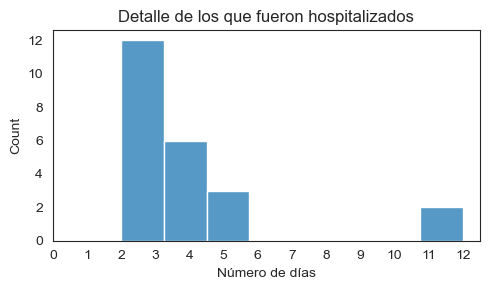

In [170]:
plt.figure(figsize=(5, 3))

sns.histplot(data=df, x=df[df['dias_hosp_mq'] !=0]['dias_hosp_mq'])

plt.title("Detalle de los que fueron hospitalizados"), plt.xlabel('Número de días')

plt.xticks(range(min(df['dias_hosp_mq']), max(df['dias_hosp_mq']) + 1, 1))

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

Se puede concluir que 94.66% de los pacientes no fueron hospitalizados por motivos médico/quirúrgicos, pero los que sí debieron ser hospitalizados, permanecieron entre 2 a 12 días, siendo 2 días el tiempo mas frecuente de permanencia.

#### 'dias_hosp_upc'

In [171]:
#Estadísticas de la columna
df['dias_hosp_upc'].describe()

count    431.000000
mean       0.018561
std        0.225427
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: dias_hosp_upc, dtype: float64

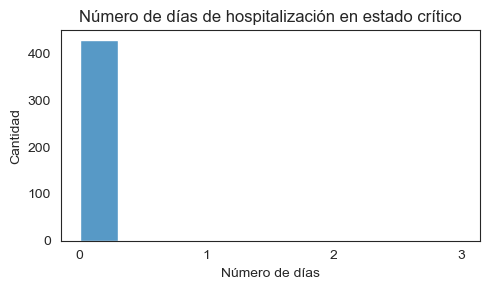

In [172]:
plt.figure(figsize=(5, 3))

sns.histplot(data=df, x=df['dias_hosp_upc'])

plt.title("Número de días de hospitalización en estado crítico"), plt.xlabel('Número de días'), plt.ylabel('Cantidad')

plt.xticks(range(min(df['dias_hosp_upc']), max(df['dias_hosp_upc']) + 1, 1))

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()


In [173]:
# Frecuencias
moda = df['dias_hosp_upc'].mode()[0]
# Cantidad de la mayor frecuencia
cantidad = (df['dias_hosp_upc'] == moda).sum()
# Total de registros
total = df['dias_hosp_upc'].count()
# Porcentaje de la mayor frecuencia
porcentaje = round(cantidad/total * 100,2)
print(f'El {porcentaje}% de los pacientes (estos son {cantidad} pacientes) no fueron hospitalizados en estado crítico, dado que registran {moda} días.')


El 99.3% de los pacientes (estos son 428 pacientes) no fueron hospitalizados en estado crítico, dado que registran 0 días.


In [174]:
con_hospitalizacion = (df['dias_hosp_upc'] > 0)
print(f'Hay {con_hospitalizacion.sum()} que fueron hospitalizados en estado crítico.')

Hay 3 que fueron hospitalizados en estado crítico.


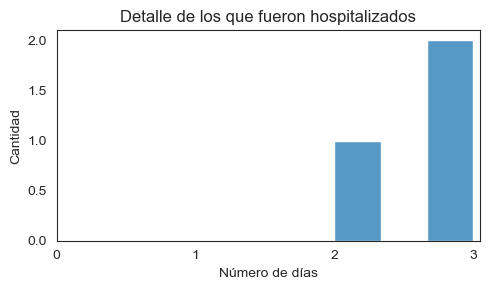

In [175]:
plt.figure(figsize=(5, 3))

sns.histplot(data=df, x=df[df['dias_hosp_upc'] !=0]['dias_hosp_upc'])

plt.title("Detalle de los que fueron hospitalizados"), plt.xlabel('Número de días'), plt.ylabel('Cantidad')

plt.xticks(range(min(df['dias_hosp_upc']), max(df['dias_hosp_upc']) + 1, 1))

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()


Se puede concluir que 99.3% de los pacientes no fueron hospitalizados en estado crítico, pero los que sí debieron ser hospitalizados, permanecieron entre 2 a 3 días, siendo 3 días el tiempo mas frecuente de permanencia.

### Variables cualitativas

#### 'antibiotico_en_profilaxis'


In [182]:
#Estadísticas de la columna
df['antibiotico_en_profilaxis'].describe()

count                                431
unique                                 4
top       FLUOROQUINOLONA_AMINOGLICOSIDO
freq                                 344
Name: antibiotico_en_profilaxis, dtype: object

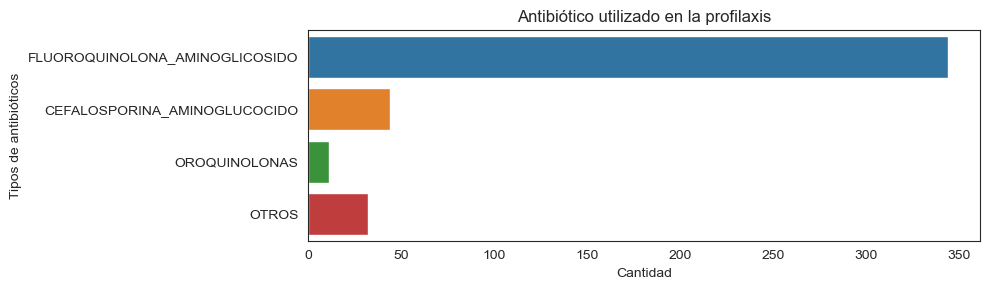

In [183]:
plt.figure(figsize=(10, 3))

sns.countplot(data=df, y=df['antibiotico_en_profilaxis'])

plt.title("Antibiótico utilizado en la profilaxis"), plt.ylabel('Tipos de antibióticos'), plt.xlabel('Cantidad')

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [184]:
round(((df['antibiotico_en_profilaxis'].value_counts() / len(df)) * 100),2)

FLUOROQUINOLONA_AMINOGLICOSIDO    79.81
CEFALOSPORINA_AMINOGLUCOCIDO      10.21
OTROS                              7.42
OROQUINOLONAS                      2.55
Name: antibiotico_en_profilaxis, dtype: float64

Casi el 80% de los pacientes utiizaron FLUOROQUINOLONA_AMINOGLICOSIDO como antibiótico de profilaxis y en segundo lugar CEFALOSPORINA_AMINOGLUCOCIDO con el 10% de los pacientes.

#### 'biopsia'


In [189]:
#Estadísticas de la columna
df['biopsia'].describe()

count     431
unique      9
top       NEG
freq      211
Name: biopsia, dtype: object

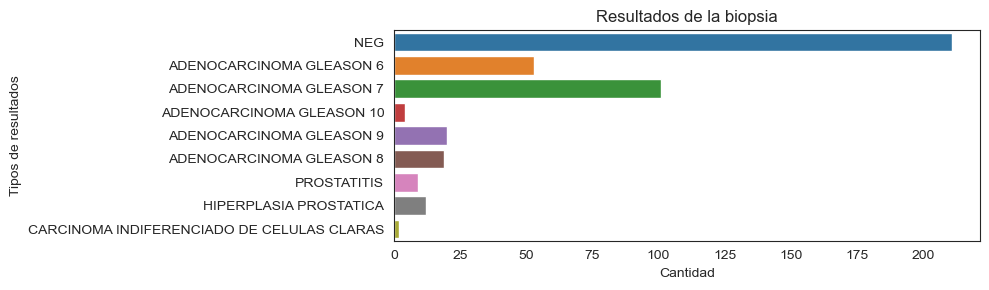

In [190]:
plt.figure(figsize=(10, 3))

sns.countplot(data=df, y=df['biopsia'])

plt.title("Resultados de la biopsia"), plt.ylabel('Tipos de resultados'), plt.xlabel('Cantidad')

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [191]:
round(((df['biopsia'].value_counts() / len(df)) * 100),2)

NEG                                           48.96
ADENOCARCINOMA GLEASON 7                      23.43
ADENOCARCINOMA GLEASON 6                      12.30
ADENOCARCINOMA GLEASON 9                       4.64
ADENOCARCINOMA GLEASON 8                       4.41
HIPERPLASIA PROSTATICA                         2.78
PROSTATITIS                                    2.09
ADENOCARCINOMA GLEASON 10                      0.93
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS     0.46
Name: biopsia, dtype: float64

Casi el 49% de los resultados de la biopsia dieron negativo para cáncer prostático, pero en el 45.71% resultó en algún grado de cancer.

#### 'tipo_cultivo'


In [194]:
#Estadísticas de la columna
df['tipo_cultivo'].describe()

count     431
unique      4
top        NO
freq      423
Name: tipo_cultivo, dtype: object

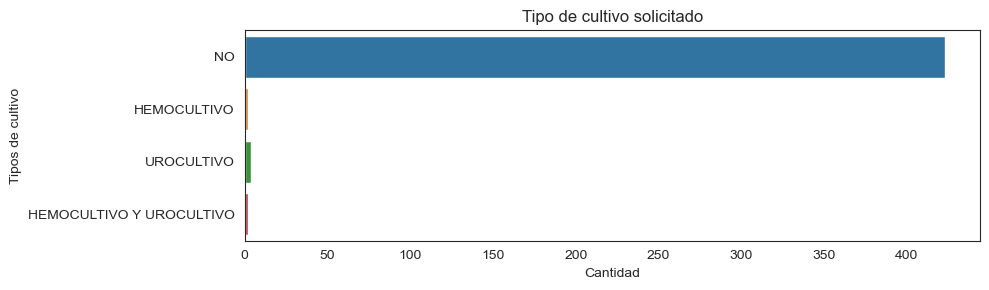

In [195]:
plt.figure(figsize=(10, 3))

sns.countplot(data=df, y=df['tipo_cultivo'])

plt.title("Tipo de cultivo solicitado"), plt.ylabel('Tipos de cultivo'), plt.xlabel('Cantidad')

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [196]:
round(((df['tipo_cultivo'].value_counts() / len(df)) * 100),2)

NO                          98.14
UROCULTIVO                   0.93
HEMOCULTIVO                  0.46
HEMOCULTIVO Y UROCULTIVO     0.46
Name: tipo_cultivo, dtype: float64

En el 98% de los casos no se pidió ningún tipo de cultivo en análisis posterior a la intervención.

#### 'agente_aislado'


In [197]:
#Estadísticas de la columna
df['agente_aislado'].describe()

count     431
unique      3
top        NO
freq      423
Name: agente_aislado, dtype: object

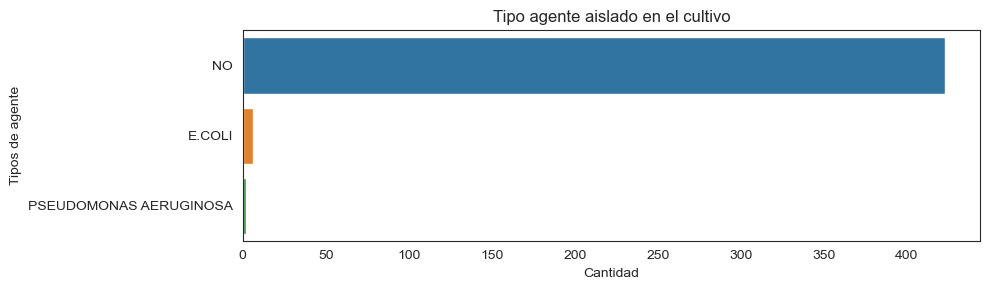

In [198]:
plt.figure(figsize=(10, 3))

sns.countplot(data=df, y=df['agente_aislado'])

plt.title("Tipo agente aislado en el cultivo"), plt.ylabel('Tipos de agente'), plt.xlabel('Cantidad')

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [199]:
round(((df['agente_aislado'].value_counts() / len(df)) * 100),2)

NO                        98.14
E.COLI                     1.39
PSEUDOMONAS AERUGINOSA     0.46
Name: agente_aislado, dtype: float64

In [200]:
con_cultivo = df[df['agente_aislado'] != 'NO']
round(((con_cultivo['agente_aislado'].value_counts() / len(con_cultivo)) * 100),2)

E.COLI                    75.0
PSEUDOMONAS AERUGINOSA    25.0
Name: agente_aislado, dtype: float64

En el 98% de los pacientes no fue necesario hacer cultivo, pero en las muestras que sí se solicitaron cultivos, en el 75% se encontró E. Coli.

#### 'patron_resistencia'


In [201]:
#Estadísticas de la columna
df['patron_resistencia'].describe()

count     431
unique      5
top        NO
freq      424
Name: patron_resistencia, dtype: object

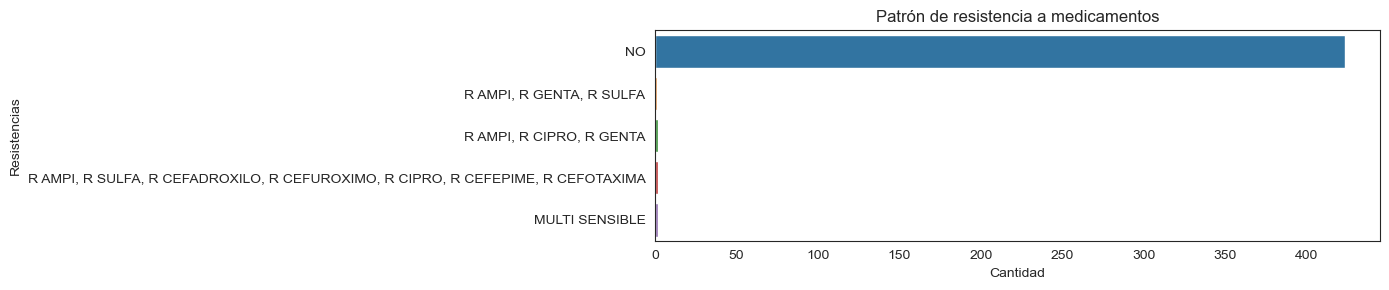

In [202]:
plt.figure(figsize=(14, 3))

sns.countplot(data=df, y=df['patron_resistencia'])

plt.title("Patrón de resistencia a medicamentos"), plt.ylabel('Resistencias'), plt.xlabel('Cantidad')

# Ajusta los espacios entre subplots y muestra
plt.tight_layout()
plt.show()

In [203]:
round(((df['patron_resistencia'].value_counts() / len(df)) * 100),2)

NO                                                                                 98.38
R AMPI, R CIPRO, R GENTA                                                            0.46
R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA     0.46
MULTI SENSIBLE                                                                      0.46
R AMPI, R GENTA, R SULFA                                                            0.23
Name: patron_resistencia, dtype: float64

In [204]:
con_resistecia = df[df['patron_resistencia'] != 'NO']
round(((con_cultivo['patron_resistencia'].value_counts() / len(con_resistecia)) * 100),2)

R AMPI, R CIPRO, R GENTA                                                           28.57
R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA    28.57
MULTI SENSIBLE                                                                     28.57
R AMPI, R GENTA, R SULFA                                                           14.29
NO                                                                                 14.29
Name: patron_resistencia, dtype: float64

En el 98% de los pacientes no presentó resistencia a los antibióticos, pero en los que sí presentaron algún tipo de resistencia, el 57.15 se presentó en alguna de estas categorías: R AMPI, R CIPRO, R GENTA y R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA.

### Comparación de categorías binarias

Para el caso de las variables 'diabetes', 'hospitaliz_ult_mes', 'biopsias_prev', 'vol_prostatico', 'cup', 'epoc', 'fiebre', 'itu' y 'hospitalizacion', al ser varibles binarias, se comparan de la siguiente manera.

In [221]:
datos_resumen = []
for columna in df.columns:
    valores_unicos = df[columna].unique()
    if "SI" in valores_unicos and "NO" in valores_unicos:
        porcentaje_si = round((df[columna] == "SI").sum() / total * 100,2)
        total_si = (df[columna] == "SI").sum()
        porcentaje_no = round(100 - porcentaje_si, 2)
        total_no = (df[columna] == "NO").sum()
        datos_resumen.append({
            'Columna': columna,
            'Porcentaje de Si': porcentaje_si,
            'Cantidad de Si': total_si,
            'Porcentaje de No': porcentaje_no,
            'Cantidad de No': total_no
        })

# Se crea un DataFrame de resumen
df_resumen = pd.DataFrame(datos_resumen)
df_resumen

,Columna,Porcentaje de Si,Cantidad de Si,Porcentaje de No,Cantidad de No
0,diabetes,11.83,51,88.17,380
1,hospitaliz_ult_mes,0.93,4,99.07,427
2,biopsias_prev,10.21,44,89.79,387
3,vol_prostatico,71.00,306,29.00,125
4,cup,0.70,3,99.30,428
5,epoc,3.25,14,96.75,417
6,fiebre,8.35,36,91.65,395
7,itu,1.39,6,98.61,425
8,hospitalizacion,5.34,23,94.66,408


In [225]:
hospitalizaciones = df[df['hospitalizacion']== 'SI']
hospitalizaciones

,edad,diabetes,hospitaliz_ult_mes,psa,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,nro_muestras,cup,epoc,biopsia,nro_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
5,55,SI,SI,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3,0
6,53,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"R AMPI, R CIPRO, R GENTA",SI,3,0
7,67,NO,NO,6.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, ...",SI,2,0
8,69,NO,NO,6.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4,0
9,54,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"R AMPI, R CIPRO, R GENTA",SI,3,0


In [227]:
# Resumen de las variables numéricas
hospitalizaciones.describe()

,edad,psa,nro_muestras,nro_dias_con_infecc,dias_hosp_mq,dias_hosp_upc
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,61.652174,8.521304,14.608696,2.391304,3.956522,0.347826
std,7.474859,6.969954,4.726513,1.117592,2.754802,0.934622
min,43.000000,4.000000,12.000000,1.000000,2.000000,0.000000
25%,55.500000,4.845000,12.000000,2.000000,2.000000,0.000000
50%,64.000000,6.200000,12.000000,2.000000,3.000000,0.000000
75%,68.500000,7.350000,15.000000,3.000000,4.000000,0.000000
max,71.000000,29.000000,24.000000,5.000000,12.000000,3.000000


In [234]:
# Resumen de las variables categóricas
hospitalizaciones.describe(include='object')

,diabetes,hospitaliz_ult_mes,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,cup,epoc,biopsia,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
count,23,23,23,23,23,23,23,23,23,23,23,23,23,23
unique,2,2,2,2,3,1,1,3,2,2,4,3,5,1
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,SI
freq,18,22,21,18,19,23,23,19,20,17,15,15,16,23


## Análisis de correlación

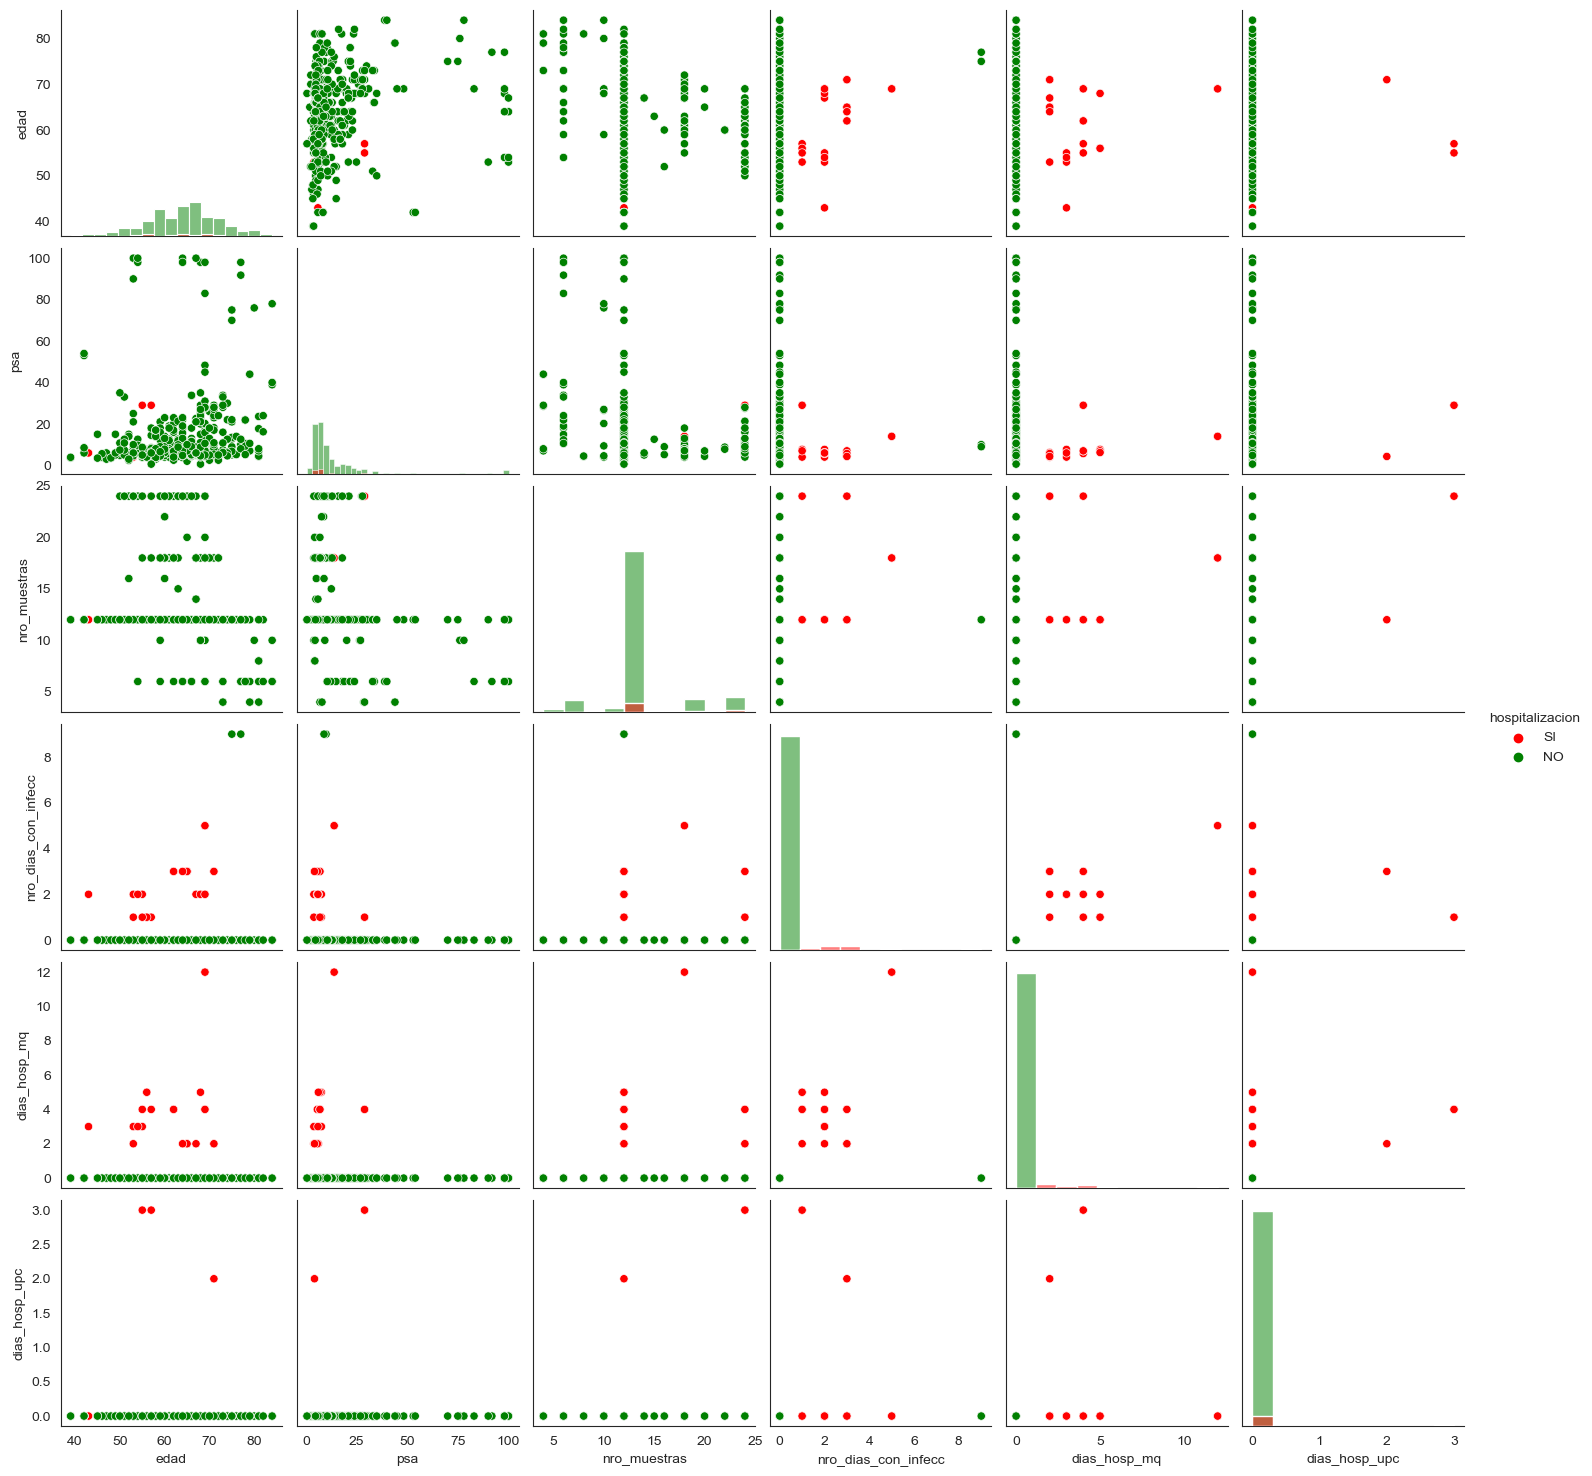

In [239]:
sns.pairplot(df, hue='hospitalizacion', diag_kind="hist", palette=['red', 'green'])
plt.show()

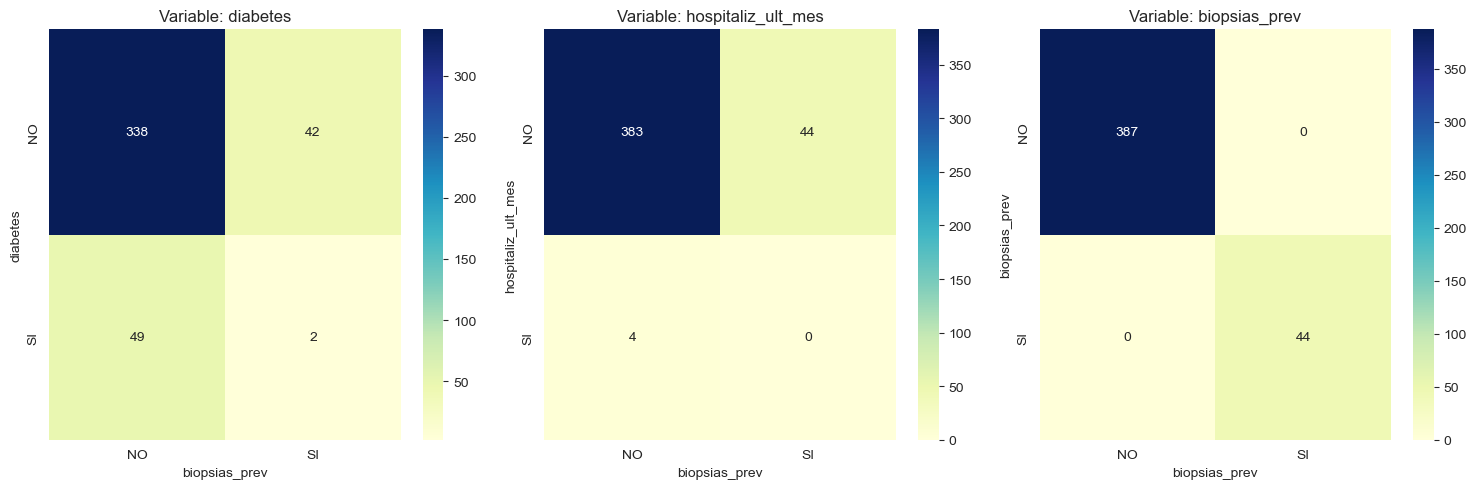

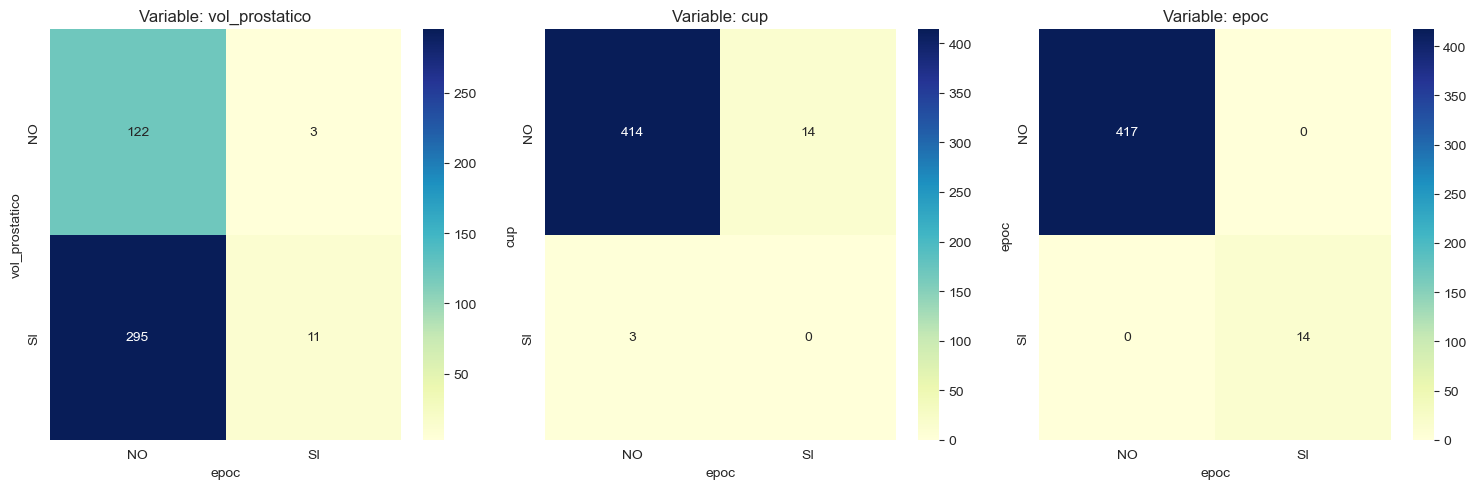

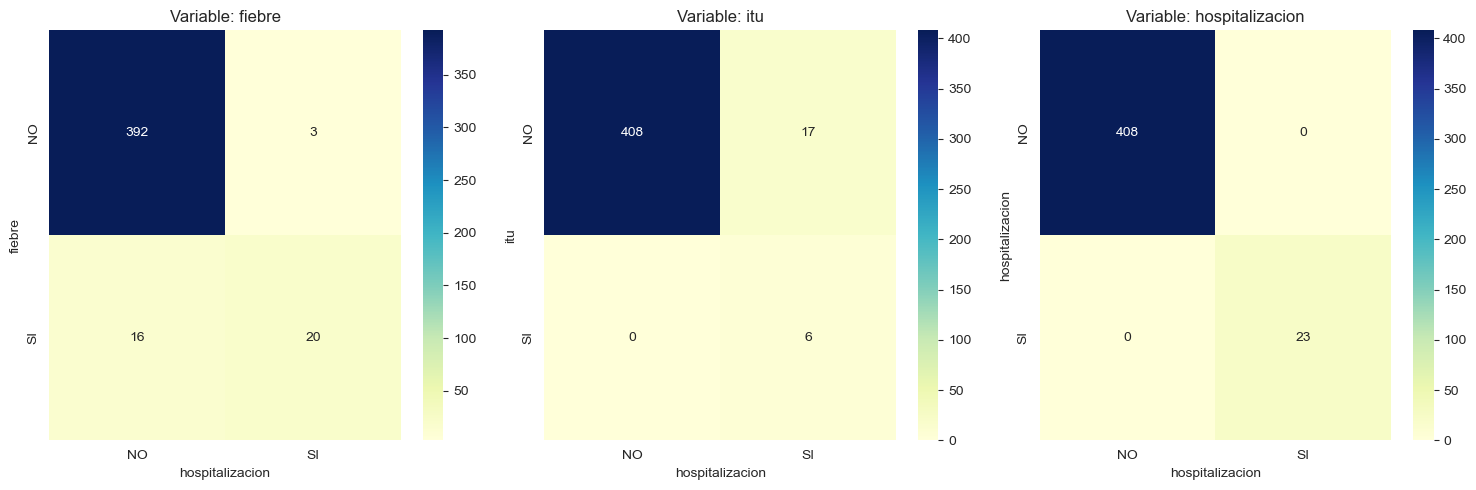

In [246]:
# Calcula la tabla de contingencia cruzando las variables

groups_of_variables = [
    ['diabetes', 'hospitaliz_ult_mes', 'biopsias_prev'],
    ['vol_prostatico', 'cup', 'epoc'],
    ['fiebre', 'itu', 'hospitalizacion']
]

for group in groups_of_variables:
    # Crea una figura con subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(group), figsize=(15, 5))
    
    # Itera a través de las variables en el grupo
    for i, variable in enumerate(group):
        contingency_table = pd.crosstab(index=df[variable], columns=df[group[-1]])
        sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', ax=axes[i])
        axes[i].set_title('Variable: ' + variable)
    
    # Ajusta el espaciado entre subplots
    plt.tight_layout()
    plt.show()


In [249]:
df_categ = df.select_dtypes(exclude=['int', 'float'])
df_categ

,diabetes,hospitaliz_ult_mes,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,cup,epoc,biopsia,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
0,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,SI
1,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,SI
2,NO,NO,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI
3,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,SI
4,NO,NO,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,NO,NO,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
429,SI,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
430,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO
431,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO


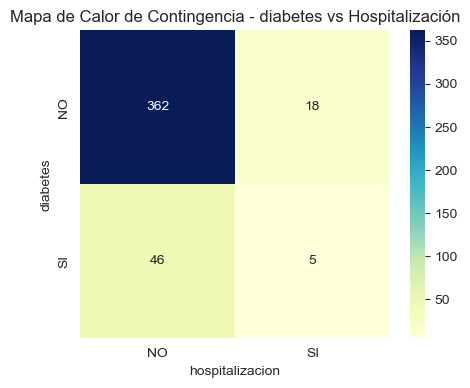

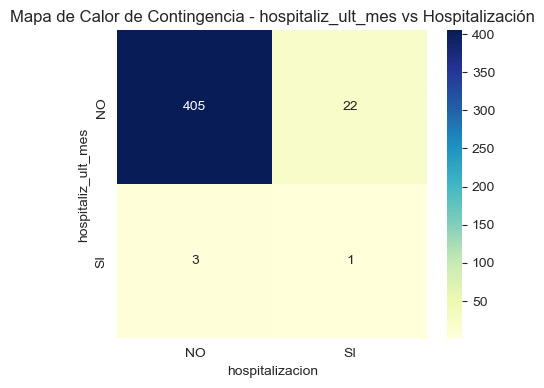

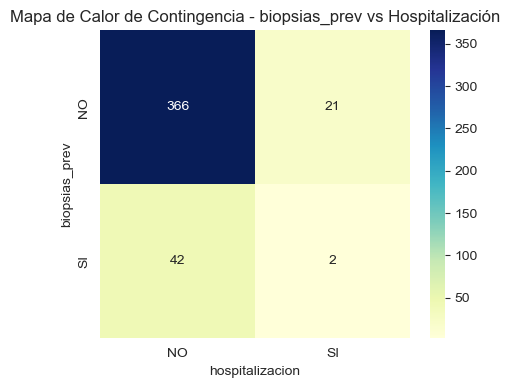

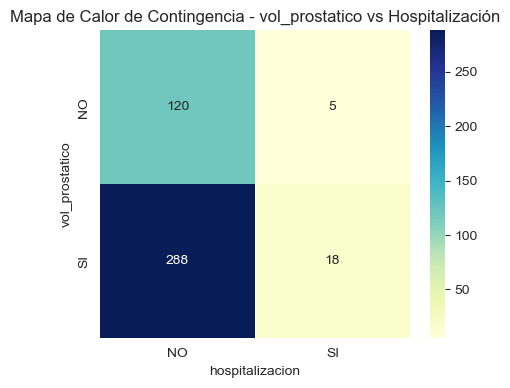

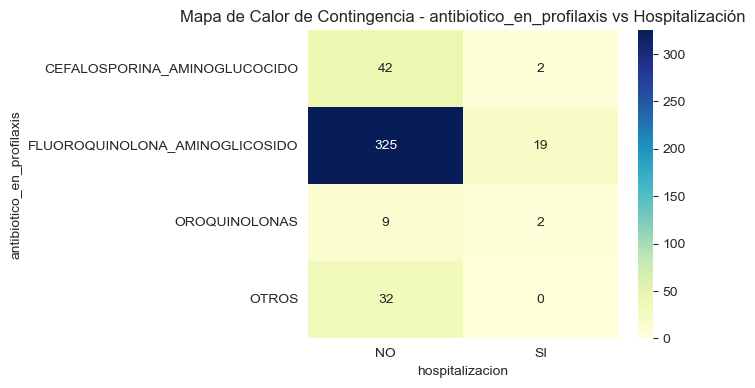

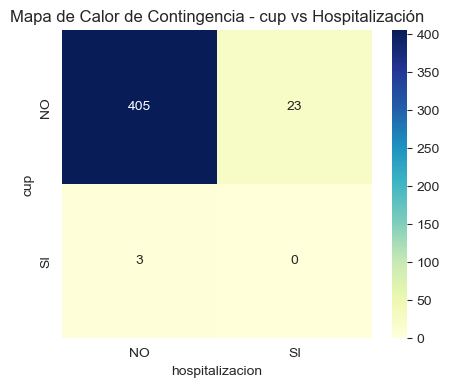

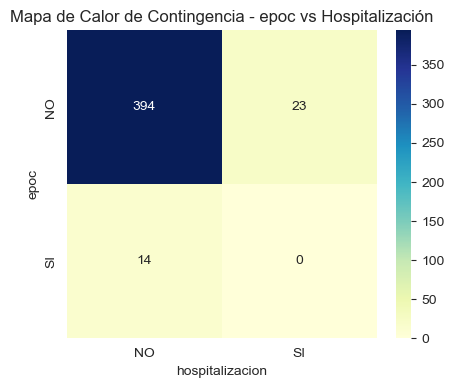

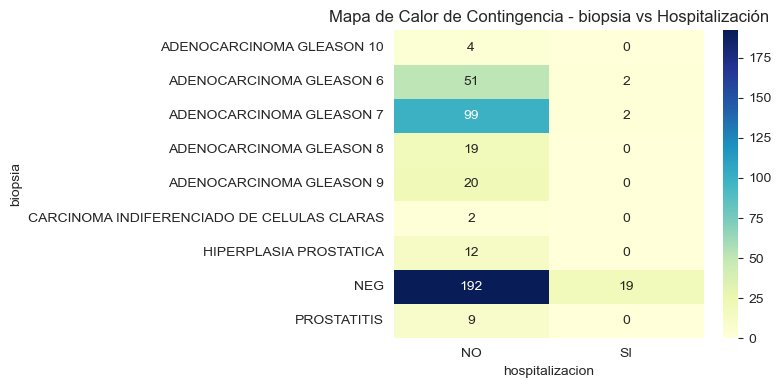

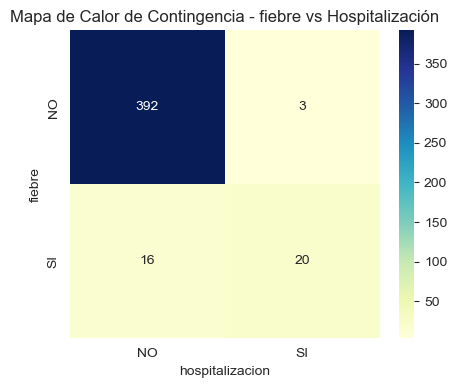

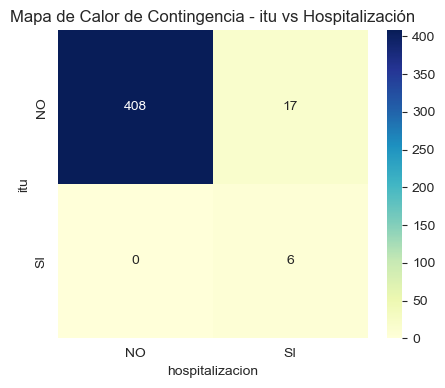

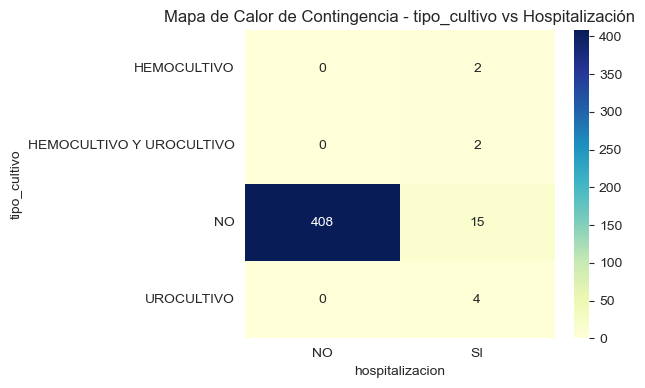

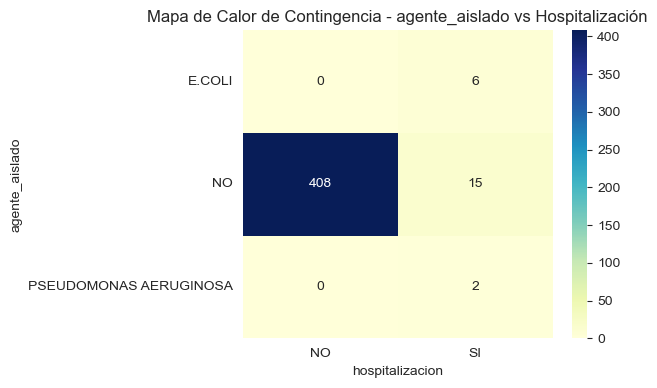

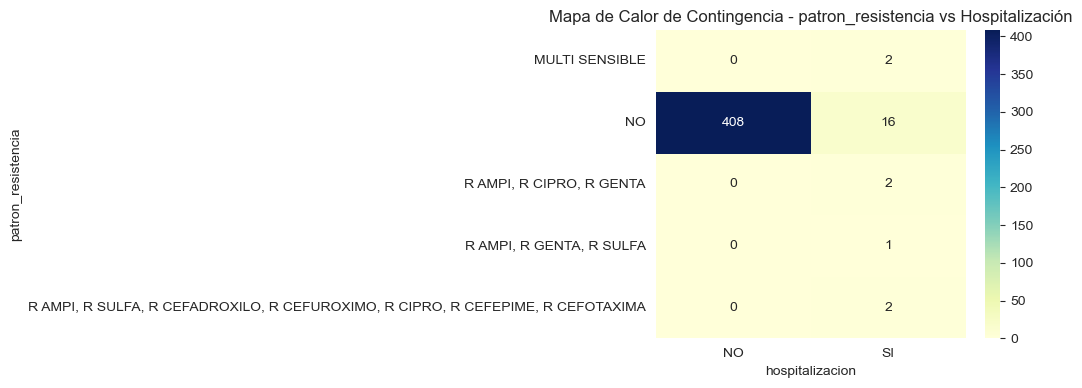

In [251]:
columns_to_compare = [col for col in df_categ.columns if col != 'hospitalizacion']

# Crea y muestra tablas de contingencia y mapas de calor para cada variable categórica
for column in columns_to_compare:
    contingency_table = pd.crosstab(index=df_categ[column], columns=df_categ['hospitalizacion'])
    plt.figure(figsize=(5, 4))
    sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
    plt.title('Mapa de Calor de Contingencia - ' + column + ' vs Hospitalización')
    plt.show()